<a href="https://colab.research.google.com/github/Adii15/darknet/blob/master/classification_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 35kB/s 


In [ ]:
!nvidia-smi

Mon Jul  5 17:30:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
#!/usr/bin/python
from PIL import Image
import os, sys

path = "/content/drive/MyDrive/CVDataset (1)/casting_data/casting_data"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((224,224), Image.ANTIALIAS)
            imResize.save(f + ' resized.jpg', 'JPEG', quality=90)

resize()

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/CVDataset (1)/casting_data/casting_data/test'
valid_path = '/content/drive/MyDrive/CVDataset (1)/casting_data/casting_data/test'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the Inception v3 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/CVDataset (1)/casting_data/casting_data/train/*')

In [ ]:
folders

['/content/drive/MyDrive/CVDataset (1)/casting_data/casting_data/train/ok_front',
 '/content/drive/MyDrive/CVDataset (1)/casting_data/casting_data/train/def_front']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='sigmoid')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CVDataset (1)/casting_data/casting_data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 6647 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CVDataset (1)/casting_data/casting_data/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 715 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
416/416 [==============================] - 1695s 4s/step - loss: 0.4901 - accuracy: 0.9252 - val_loss: 0.1182 - val_accuracy: 0.9748
Epoch 2/10
416/416 [==============================] - 740s 2s/step - loss: 0.2235 - accuracy: 0.9677 - val_loss: 0.0712 - val_accuracy: 0.9874
Epoch 3/10
416/416 [==============================] - 741s 2s/step - loss: 0.2680 - accuracy: 0.9687 - val_loss: 0.2250 - val_accuracy: 0.9734
Epoch 4/10
416/416 [==============================] - 739s 2s/step - loss: 0.2052 - accuracy: 0.9783 - val_loss: 0.2998 - val_accuracy: 0.9636
Epoch 5/10
416/416 [==============================] - 740s 2s/step - loss: 0.1985 - accuracy: 0.9815 - val_loss: 0.0532 - val_accuracy: 0.9930
Epoch 6/10
416/416 [==============================] - 749s 2s/step - loss: 0.2124 - accuracy: 0.9794 - val_loss: 0.5029 - val_accuracy: 0.9329
Epoch 7/10
416/416 [==============================] - 744s 2s/step - loss: 0.2602 - accuracy: 0.9818 - val_loss: 0.2544 - val_accuracy: 0.988

In [ ]:
import matplotlib.pyplot as plt

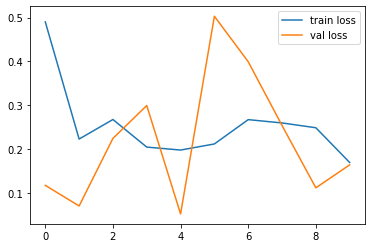

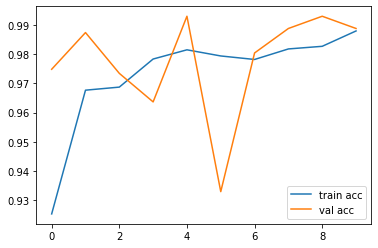

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:

# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[9.9999672e-01, 3.7559010e-07],
       [1.0000000e+00, 2.0787764e-18],
       [1.0000000e+00, 1.2797961e-29],
       ...,
       [4.3265325e-17, 1.0000000e+00],
       [1.0000000e+00, 6.9011067e-24],
       [1.0000000e+00, 1.1832241e-12]], dtype=float32)

In [ ]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_inception.h5')

In [ ]:
model

In [ ]:
img=image.load_img('/content/drive/MyDrive/CVDataset (1)/casting_data/casting_data/test/def_front/cast_def_0_1096.jpeg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[170., 170., 170.],
        [174., 174., 174.],
        [177., 177., 177.],
        ...,
        [151., 151., 151.],
        [151., 151., 151.],
        [150., 150., 150.]],

       [[178., 178., 178.],
        [173., 173., 173.],
        [171., 171., 171.],
        ...,
        [153., 153., 153.],
        [153., 153., 153.],
        [150., 150., 150.]],

       [[181., 181., 181.],
        [175., 175., 175.],
        [173., 173., 173.],
        ...,
        [151., 151., 151.],
        [150., 150., 150.],
        [147., 147., 147.]],

       ...,

       [[194., 194., 194.],
        [195., 195., 195.],
        [192., 192., 192.],
        ...,
        [161., 161., 161.],
        [161., 161., 161.],
        [161., 161., 161.]],

       [[194., 194., 194.],
        [194., 194., 194.],
        [192., 192., 192.],
        ...,
        [161., 161., 161.],
        [161., 161., 161.],
        [161., 161., 161.]],

       [[194., 194., 194.],
        [192., 192., 192.],
        [191., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[9.9948257e-01, 2.1135807e-04]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [45]:
a==1

array([False])